In [1]:
!git clone https://github.com/abhishict/TextMiningProject.git

fatal: destination path 'TextMiningProject' already exists and is not an empty directory.


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_comments = pd.read_csv('TextMiningProject/data/cleaned_dataset.csv')
print(df_comments.shape)
df_comments.head()

(5184, 4)


,Label,Description,Cleaned_Description,Article_Length
0,Environmental Concern,Brake pad dust can be more toxic than exhaust ...,brake pad dust toxic exhaust emission study say,8
1,Environmental Benefit,EVs and datacentres driving new global ‘age of...,datacentres driving global age electricity say...,7
2,Economic Challenge,EV drivers spend extra £85m on VAT when using ...,driver spend extra vat using public charger,7
3,Economic Challenge,UK used electric vehicle sales hit record last...,uk used sale hit record last price fell,8
4,Environmental Benefit,Promoting green growth does not make you an ‘e...,promoting green growth econutter way forward,6


In [2]:
df_comments = df_comments.dropna(subset=['Cleaned_Description'])

# Vectorize the cleaned descriptions using TF-IDF
vectorizer = TfidfVectorizer( stop_words='english',
                              max_features=100,
                              min_df=2, max_df=0.7)
X_tfidf = vectorizer.fit_transform(df_comments['Cleaned_Description'])
X_tfidf.shape

(5170, 100)

In [5]:
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.dropna()
tfidf_df.shape

(5170, 100)

In [7]:
tfidf_df.to_csv('cleaned_reviews.csv', index=False)

In [ ]:
install.packages("coop")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("dendextend")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘viridis’




In [2]:
head(data)

,actually,automaker,better,big,billion,build,business,buy,carbon,change,⋯,use,used,using,want,way,week,weekly,welcome,work,world
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0.0000000,0.0000000,0,0.0000000,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0.0000000,0.0000000,0,0.0000000,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0.0000000,0.7085128,0,0.0000000,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,⋯,0,0.5083312,0.0000000,0,0.0000000,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,⋯,0,0.0000000,0.0000000,0,0.6654318,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0.0000000,0.0000000,0,0.0000000,0,0,0,0,0


In [3]:
anyNA(sample_data)        # Should be FALSE
any(is.infinite(as.matrix(sample_data)))  # Should also be FALSE

[1] FALSE

[1] FALSE

In [10]:
library(coop)

# Cosine similarity
cos_sim <- cosine(t(sample_data))

# Convert to cosine distance matrix
cos_dist <- as.dist(1 - cos_sim)

# Check again
anyNA(cos_dist)
any(is.infinite(cos_dist))

[1] TRUE

[1] FALSE

[1] 79 91

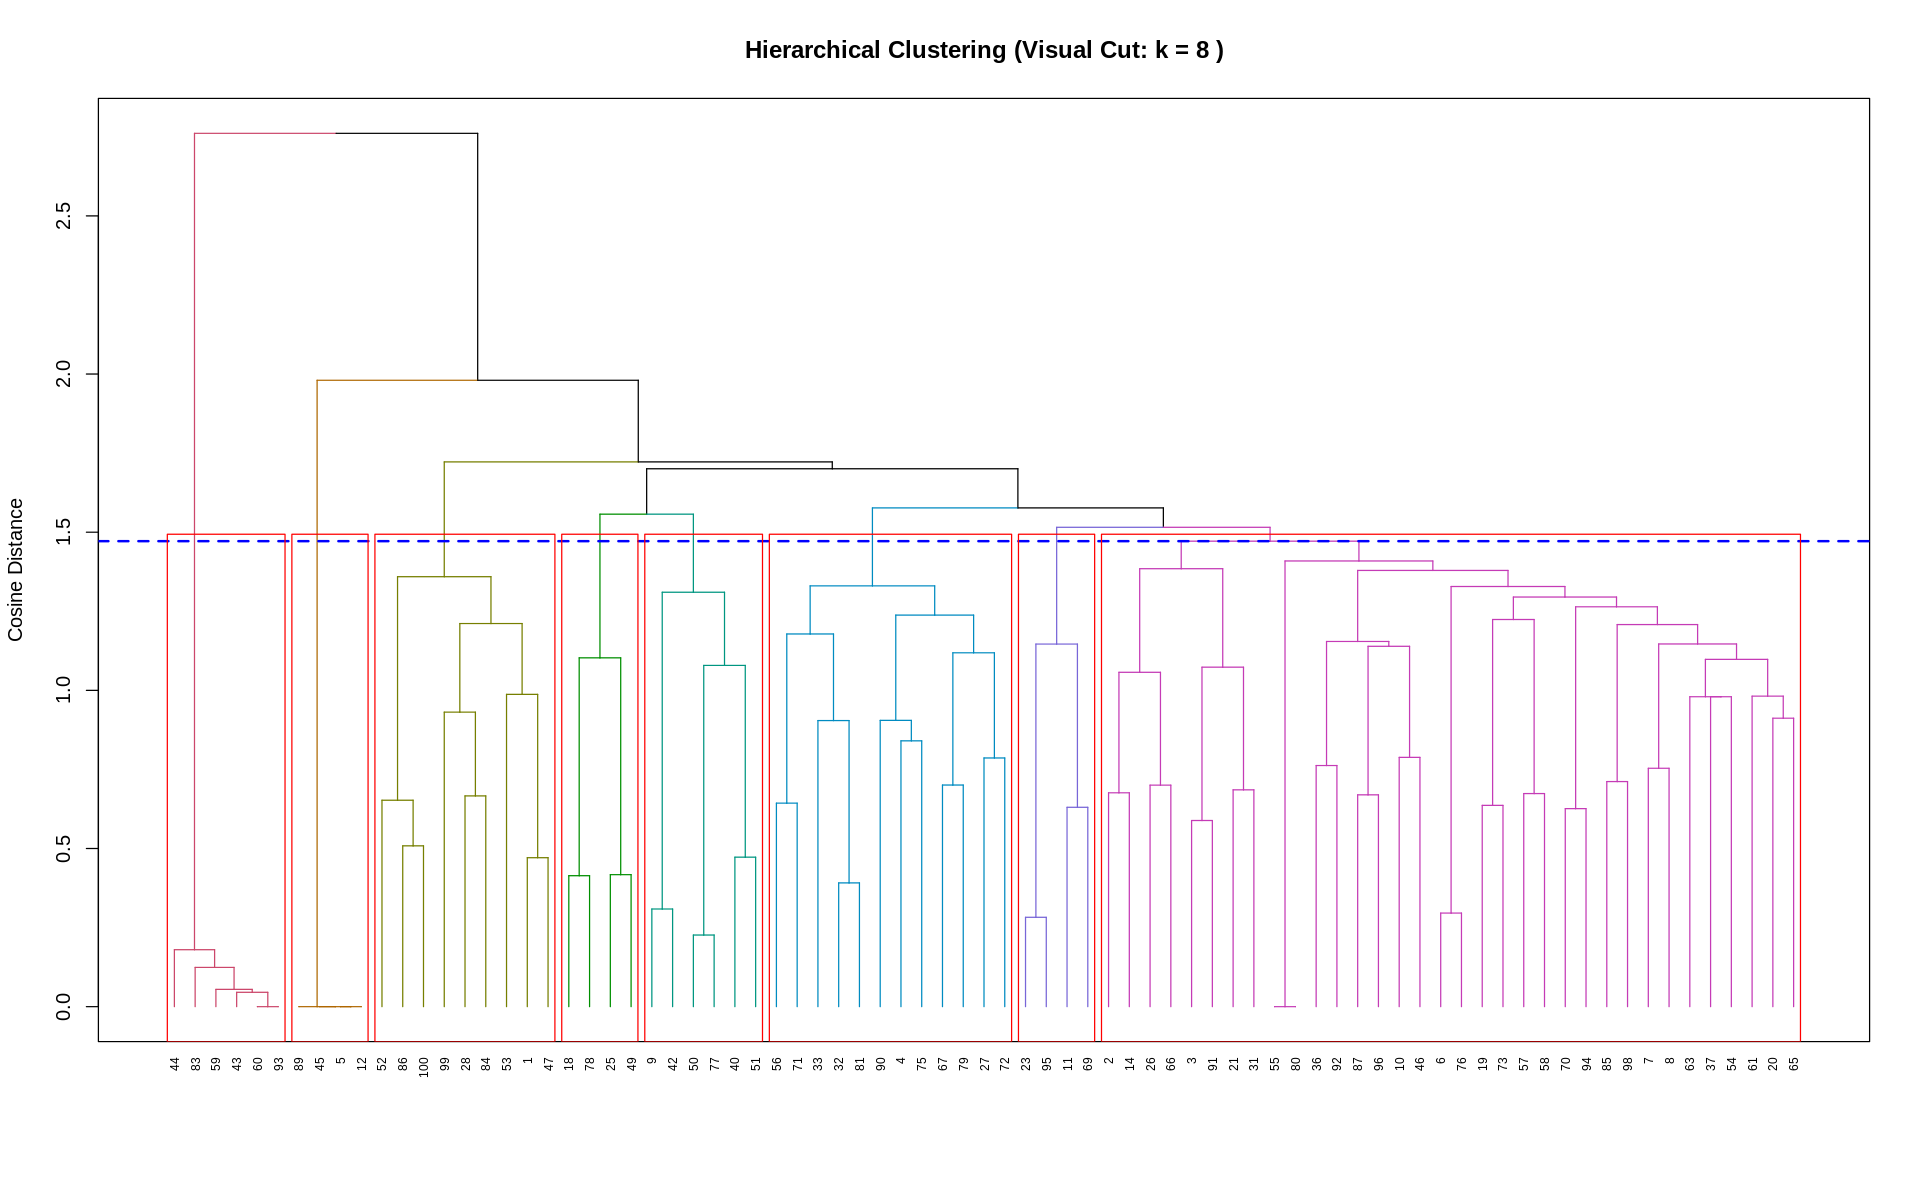

In [18]:
library(coop)
library(dendextend)

# Load data
review_matrix <- read.csv("/content/cleaned_reviews.csv")

# Sample 100 reviews for clear visualization
set.seed(42)
sample_indices <- sample(1:nrow(review_matrix), 100)
review_sample <- review_matrix[sample_indices, ]

# Ensure numeric matrix and remove zero rows/columns
review_sample <- as.data.frame(lapply(review_sample, as.numeric))
review_sample <- review_sample[, colSums(review_sample) != 0]
review_sample <- review_sample[rowSums(review_sample) != 0, ]
review_sample_scaled <- scale(review_sample)

# Cosine similarity and distance matrix
cosine_similarity <- cosine(t(review_sample_scaled))
cosine_distance <- as.dist(1 - cosine_similarity)

# Hierarchical clustering using Ward's method
hclust_model <- hclust(cosine_distance, method = "ward.D2")
dendrogram <- as.dendrogram(hclust_model)

# Visualize with k clusters
k_clusters <- 8
colored_dend <- color_branches(dendrogram, k = k_clusters)

# Set plot margins
par(mar = c(6.5, 4, 4, 2) + 0.1)

# Plot dendrogram
plot(colored_dend,
     main = paste("Hierarchical Clustering (k =", k_clusters, ")"),
     ylab = "Cosine Distance",
     xlab = "",
     sub = "",
     axes = FALSE,
     leaflab = "none")

# Adjust label appearance
options(repr.plot.width = 16, repr.plot.height = 10)
leaf_labels <- labels(colored_dend)
label_pos <- 1:length(leaf_labels)

text(x = label_pos,
     y = rep(par("usr")[3] - 0.05, length(leaf_labels)),
     labels = leaf_labels,
     srt = 90,
     adj = 1,
     xpd = TRUE,
     cex = 0.6)

axis(2)
box()

# Draw cut line and cluster boxes
cut_height <- hclust_model$height[length(hclust_model$height) - (k_clusters - 1)]
abline(h = cut_height, col = "blue", lty = 2, lwd = 2)
rect.hclust(hclust_model, k = k_clusters, border = "red")
